# DSL Project

### Data Preparation

We load both the dataset, development and evaluation set, with the appropriate function of pandas that transforms files csv in dataframes.

In [132]:
import numpy as np
import pandas as pd

dev_set = pd.read_csv("development.csv", index_col="id")
eval_set = pd.read_csv("evaluation.csv", index_col="id")
df = pd.concat([dev_set, eval_set], sort=False)

dev_set.shape, eval_set.shape, df.shape

((31715, 49), (7917, 48), (39632, 49))

We check the name of the features of our dataset. Note that the features are the same in both the datasets except for *shares*, i.e. the last colum.

In [133]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_pola

The features *url* and *timedelta* are not predictive since they are metadata, so we discard them and keep the rest.

In [134]:
df.drop(columns=['url', 'timedelta'], inplace=True)
df.shape

(39632, 47)

Then we divide the features in categories for a better exploration.

In [135]:
word_features = ['n_tokens_title', 
                 'n_tokens_content', 
                 'n_unique_tokens', 
                 'n_non_stop_words', 
                 'n_non_stop_unique_tokens', 
                 'average_token_length']

media_features = ['num_imgs', 'num_videos']

categorical_features = ['weekday', 'data_channel']

keyword_features = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs',
                      'num_self_hrefs',
                      'self_reference_min_shares',
                      'self_reference_max_shares',
                      'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']

We check that the sum of elements of each division is equal to the total of features present in the dataset (i.e. 46 + shares columns).

In [136]:
check_1 = len(word_features) + len(media_features) + len(categorical_features) + len(keyword_features) \
+ len(reference_features) + len(topic_features) + len(subjectivity_features) + len(sentiment_features)
check_1

46

### Data Cleaning

In this section we use the command *.describe()* to have un overview on each column of the categories found before. From the table produced we see possible missing values (i.e. through the rows *count*) and possible outliers. We replace missing values and we replace outliers with the max/min value of the range of the boxplot.

WORD FEATURES

In [137]:
df[word_features].describe([.01, .25, .5, .75, .99])

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length
count,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000
mean,10.398466,546.594040,0.548245,0.996543,0.689222,4.548522
std,2.114075,471.137433,3.521238,5.232016,3.265305,0.843586
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470889,1.000000,0.625767,4.478405
50%,10.000000,409.000000,0.539226,1.000000,0.690476,4.664070
75%,12.000000,716.000000,0.608696,1.000000,0.754620,4.854850
99%,15.000000,2256.380000,0.802425,1.000000,0.921053,5.444740
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,8.041534


There are no missing values (count = len(df)) but there are outliers.

In [138]:
for feature in df[word_features]:
    percentiles = df[feature].quantile([0.01, 0.96]).values
    df.loc[df[feature] <= percentiles[0], feature] = percentiles[0]
    df.loc[df[feature] >= percentiles[1], feature] = percentiles[1]

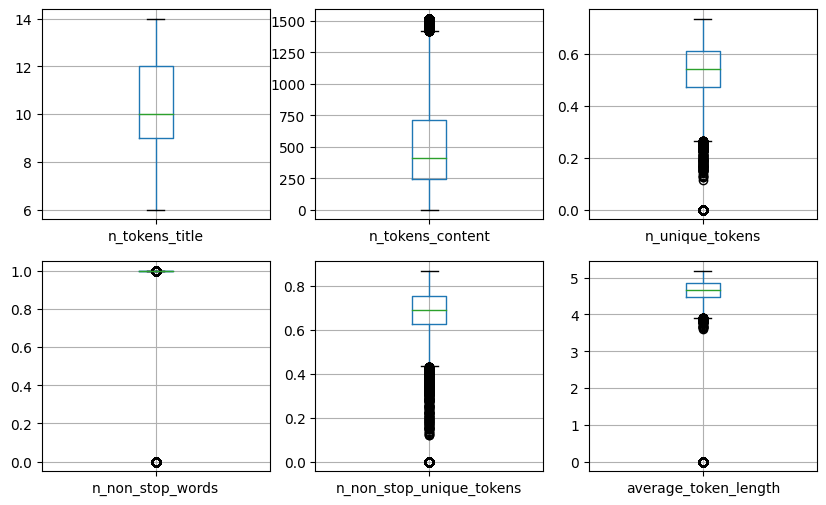

In [139]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
i=0; j=0
for feature in df[word_features]:
    df.boxplot(column=feature, ax=ax[i][j])
    j+=1
    if j==3: i+=1; j=0
plt.show()

We handle some features separately.

<AxesSubplot: >

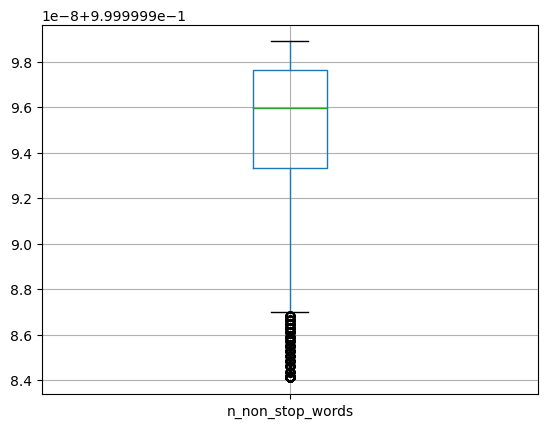

In [140]:
percentiles = df["n_non_stop_words"].quantile([0.05, 0.96]).values
df.loc[df["n_non_stop_words"] <= percentiles[0], "n_non_stop_words"] = percentiles[0]
df.loc[df["n_non_stop_words"] >= percentiles[1], "n_non_stop_words"] = percentiles[1]
df.boxplot(column="n_non_stop_words")

<AxesSubplot: >

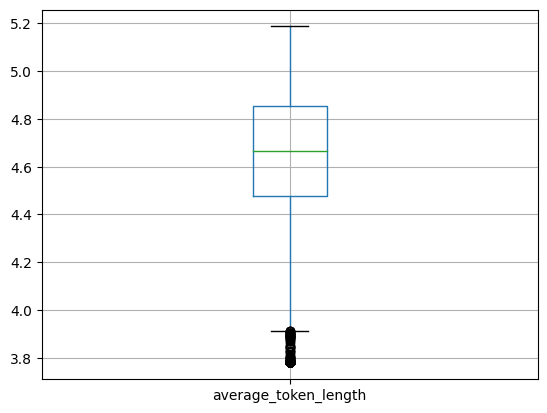

In [141]:
percentiles = df["average_token_length"].quantile([0.03, 0.96]).values
df.loc[df["average_token_length"] <= percentiles[0], "average_token_length"] = percentiles[0]
df.loc[df["average_token_length"] >= percentiles[1], "average_token_length"] = percentiles[1]
df.boxplot(column="average_token_length")



---



MEDIA FEATURES

In [142]:
df[media_features].describe([.01, .25, .5, .75, .99])

,num_imgs,num_videos
count,31705.000000,31707.000000
mean,4.569153,1.256631
std,8.375140,4.147667
min,0.000000,0.000000
1%,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,4.000000,1.000000
99%,38.000000,21.000000
max,128.000000,91.000000


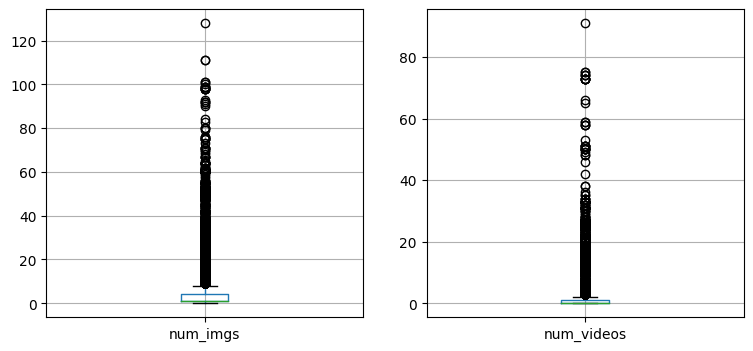

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
i=0; j=0
for feature in df[media_features]:
    df.boxplot(column=feature, ax=ax[i])
    i+=1
plt.show()

There are both missing values and outliers.

In [101]:
for feature in df[media_features]:
    percentiles = df[feature].quantile([0.01, 0.98]).values
    df.loc[df[feature] <= percentiles[0], feature] = percentiles[0]
    df.loc[df[feature] >= percentiles[1], feature] = percentiles[1]

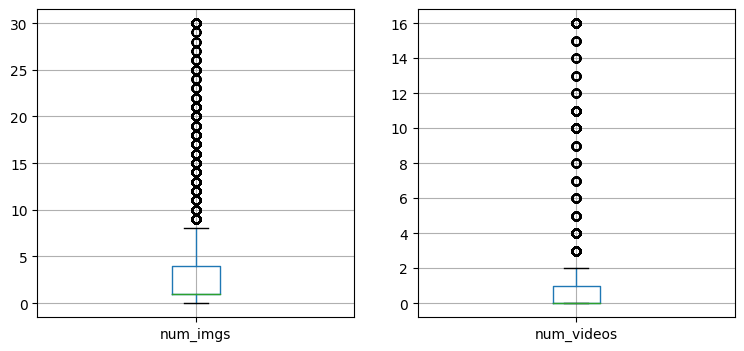

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
i=0; j=0
for feature in df[media_features]:
    df.boxplot(column=feature, ax=ax[i])
    i+=1
plt.show()

Once some outliers are removed we can address missing values.

In [103]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df[media_features] = imputer.fit_transform(df[media_features])

Check that all the missing values are replaced.

In [104]:
df[media_features].isna().any(axis=0)

num_imgs      False
num_videos    False
dtype: bool



---



CATEGORICAL FEATURES

In [105]:
df[categorical_features].isna().any()

weekday         False
data_channel    False
dtype: bool

There are no missing values and since these are categorical data there are no outliers.

---



KEYWORD FEATURES

In [106]:
df[keyword_features].describe([.01, .1, .25, .5, .75, .99])

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,num_keywords
count,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,31706.000000
mean,26.109255,1150.784353,311.849104,13614.093813,752312.063484,259245.831894,1116.972352,5653.442080,3134.959557,7.222292
std,69.635780,3805.155066,611.668524,57994.580562,214513.036048,135080.103885,1137.359039,6068.105972,1313.788081,1.903468
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
1%,-1.000000,0.000000,-1.000000,0.000000,37400.000000,13036.936508,0.000000,2561.217822,1339.707022,3.000000
10%,-1.000000,224.000000,76.410000,0.000000,617900.000000,107643.750000,0.000000,3323.745161,2008.205602,5.000000
25%,-1.000000,445.000000,141.741071,0.000000,843300.000000,172811.875000,0.000000,3562.101631,2382.223989,6.000000
50%,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244547.833334,1023.571429,4355.028835,2869.804792,7.000000
75%,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330927.083333,2056.703333,6019.687501,3599.698192,9.000000
99%,217.000000,10400.000000,1702.032619,208300.000000,843300.000000,636025.000000,3511.526525,23800.000000,7008.936513,10.000000


As we can see there are missing values for the feature *num_keywords*. Let us handle outliers first.

In [107]:
for feature in df[keyword_features]:
    percentiles = df[feature].quantile([0.01, 0.96]).values
    df.loc[df[feature] <= percentiles[0], feature] = percentiles[0]
    df.loc[df[feature] >= percentiles[1], feature] = percentiles[1]

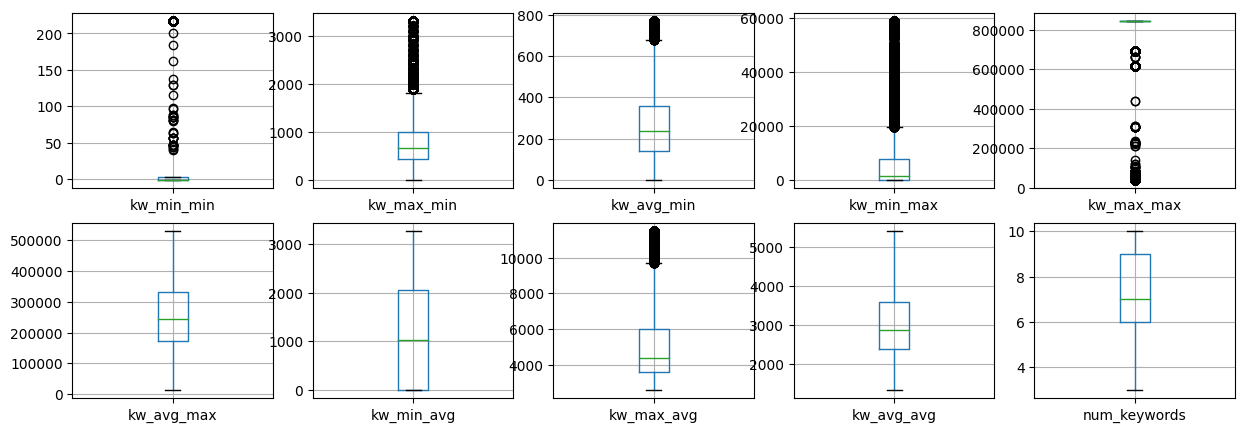

In [108]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
i=0; j=0
for feature in df[keyword_features]:
    df.boxplot(column=feature, ax=ax[i][j])
    j+=1
    if j==5: i+=1; j=0
plt.show()

Now we fill missing values.

In [109]:
imputer = SimpleImputer(strategy="median")
df[keyword_features] = imputer.fit_transform(df[keyword_features])

Then we check that all the missing values are replaced.

In [110]:
df[keyword_features].isna().any(axis=0)

kw_min_min      False
kw_max_min      False
kw_avg_min      False
kw_min_max      False
kw_max_max      False
kw_avg_max      False
kw_min_avg      False
kw_max_avg      False
kw_avg_avg      False
num_keywords    False
dtype: bool



---



REFERENCE FEATURES

In [111]:
df[reference_features].describe(percentiles=[.25, .5, .75, .95, .99])

,num_hrefs,num_self_hrefs,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
count,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000
mean,10.882343,3.293803,3997.854231,10325.913574,6400.472172
std,11.329557,3.855424,19740.280171,41028.860254,24213.814594
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,639.000000,1100.000000,981.187500
50%,8.000000,3.000000,1200.000000,2800.000000,2200.000000
75%,14.000000,4.000000,2600.000000,7900.000000,5200.000000
95%,30.000000,9.000000,13600.000000,36600.000000,21340.833333
99%,56.000000,20.000000,53100.000000,98700.000000,67769.000000
max,304.000000,116.000000,843300.000000,843300.000000,843300.000000


There are no missing values but there are some outliers.

In [112]:
for feature in df[reference_features]:
    percentiles = df[feature].quantile([0.01, 0.99]).values
    df.loc[df[feature] <= percentiles[0], feature] = percentiles[0]
    df.loc[df[feature] >= percentiles[1], feature] = percentiles[1]

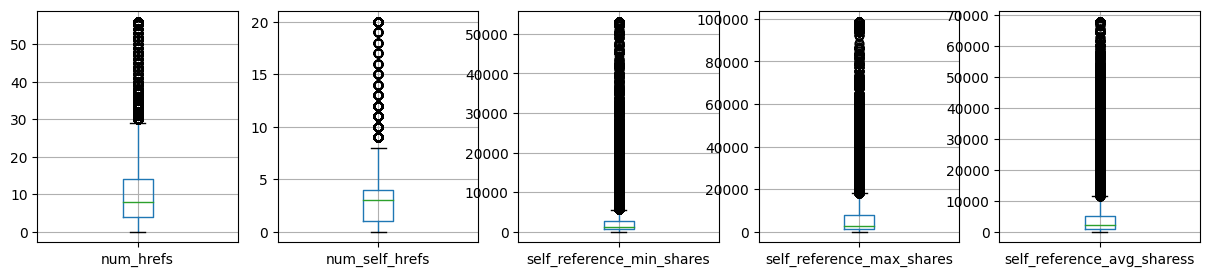

In [113]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
i=0
for feature in df[reference_features]:
    df.boxplot(column=feature, ax=ax[i])
    i+=1
plt.show()

We handle some features separately.

<AxesSubplot: >

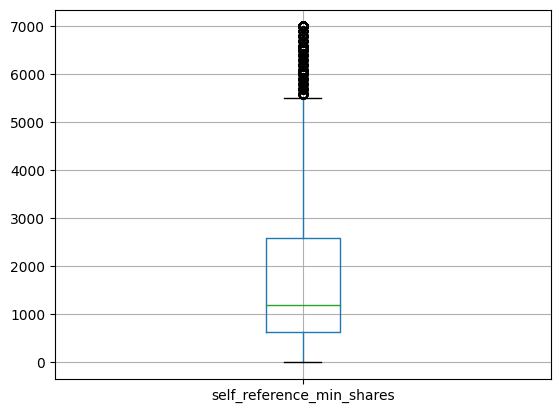

In [114]:
percentiles = df["self_reference_min_shares"].quantile([0.01, 0.90]).values
df.loc[df["self_reference_min_shares"] <= percentiles[0], "self_reference_min_shares"] = percentiles[0]
df.loc[df["self_reference_min_shares"] >= percentiles[1], "self_reference_min_shares"] = percentiles[1]
df.boxplot(column="self_reference_min_shares")

<AxesSubplot: >

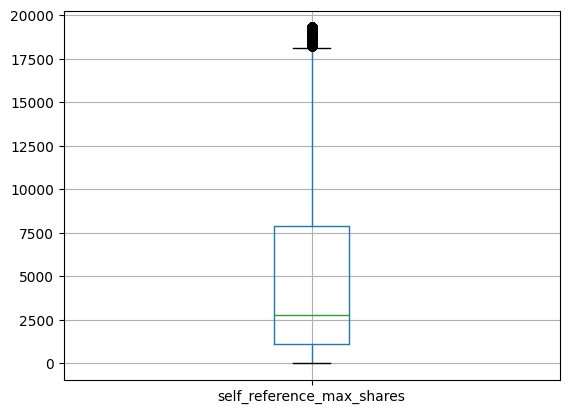

In [115]:
percentiles = df["self_reference_max_shares"].quantile([0.01, 0.90]).values
df.loc[df["self_reference_max_shares"] <= percentiles[0], "self_reference_max_shares"] = percentiles[0]
df.loc[df["self_reference_max_shares"] >= percentiles[1], "self_reference_max_shares"] = percentiles[1]
df.boxplot(column="self_reference_max_shares")

<AxesSubplot: >

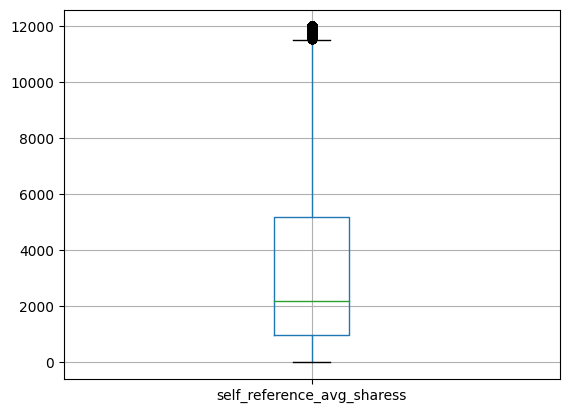

In [116]:
percentiles = df["self_reference_avg_sharess"].quantile([0.01, 0.90]).values
df.loc[df["self_reference_avg_sharess"] <= percentiles[0], "self_reference_avg_sharess"] = percentiles[0]
df.loc[df["self_reference_avg_sharess"] >= percentiles[1], "self_reference_avg_sharess"] = percentiles[1]
df.boxplot(column="self_reference_avg_sharess")



---



TOPIC FEATURES

In [117]:
df[topic_features].describe(percentiles=[.25, .5, .75, .95, .99])

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
count,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000
mean,0.184616,0.141274,0.216355,0.223651,0.234079
std,0.262990,0.219717,0.282169,0.295121,0.289210
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025051,0.025012,0.028571,0.028571,0.028574
50%,0.033387,0.033345,0.040004,0.040001,0.040741
75%,0.240990,0.150868,0.334291,0.375042,0.400014
95%,0.839529,0.713449,0.866487,0.866631,0.883678
99%,0.899949,0.885589,0.910986,0.910808,0.919504
max,0.926994,0.925947,0.919999,0.926534,0.927191


Here we have no missing values and outliers either.

---



SUBJECTIVITY FEATURES

In [118]:
df[subjectivity_features].describe(percentiles=[.25, .5, .75, .95, .99])

,global_subjectivity,title_subjectivity,abs_title_subjectivity
count,39632.000000,39632.000000,39632.000000
mean,0.443390,0.282352,0.341812
std,0.116623,0.324218,0.188797
min,0.000000,0.000000,0.000000
25%,0.396175,0.000000,0.166667
50%,0.453457,0.150000,0.500000
75%,0.508333,0.500000,0.500000
95%,0.600249,1.000000,0.500000
99%,0.685286,1.000000,0.500000
max,1.000000,1.000000,0.500000


Here we have no missing values and outliers either.

---






SENTIMENT FEATURES

In [119]:
df[sentiment_features].describe(percentiles=[.25, .5, .75, .95, .99])

,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_sentiment_polarity
count,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000,39632.000000
mean,0.119306,0.039627,0.016614,0.682183,0.287968,0.353850,0.095453,0.756764,-0.259532,-0.521971,-0.107502,0.071405,0.156056
std,0.096926,0.017427,0.010827,0.190130,0.156148,0.104510,0.071315,0.247722,0.127704,0.290252,0.095377,0.265426,0.226264
min,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.057757,0.028384,0.009615,0.600000,0.185185,0.306250,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000
50%,0.119117,0.039024,0.015337,0.710526,0.280000,0.358765,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.000000,0.000000
75%,0.177832,0.050281,0.021739,0.800000,0.384615,0.411429,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.150000,0.250000
95%,0.276315,0.068364,0.036000,0.928571,0.555556,0.500606,0.200000,1.000000,0.000000,0.000000,0.000000,0.500000,0.600000
99%,0.373040,0.085203,0.052342,1.000000,0.707574,0.600000,0.400000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


Here we have no missing values and outliers either.

---






TARGET VALUE

In [120]:
df["shares"].describe(percentiles=[.25, .5, .75, .95, .99])

count     31715.000000
mean       3407.068863
std       11899.460219
min           4.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
95%       10730.000000
99%       32186.000000
max      843300.000000
Name: shares, dtype: float64

The shares column seems to contain missing values but if we check that column in the development set 

In [121]:
dev_set["shares"].isna().any()

False

it has all the target values, meaning that the missing values are only due to the evaluation set as expected.

Let us handle outliers.

<AxesSubplot: >

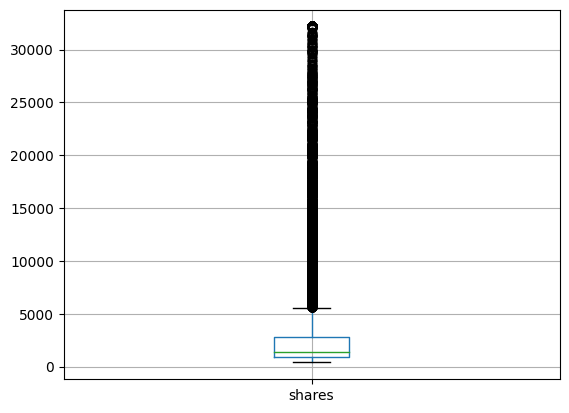

In [122]:
percentiles = df["shares"].quantile([0.01, 0.99]).values
df.loc[df["shares"] <= percentiles[0], "shares"] = percentiles[0]
df.loc[df["shares"] >= percentiles[1], "shares"] = percentiles[1]
df.boxplot(column="shares")

In [123]:
df["shares"].describe(percentiles=[.25, .5, .75, .95, .99])

count    31715.000000
mean      2983.052436
std       4685.214499
min        383.000000
25%        946.000000
50%       1400.000000
75%       2800.000000
95%      10730.000000
99%      32173.960000
max      32186.000000
Name: shares, dtype: float64

### Data Preprocessing

We do the encoding of categorical features.

In [124]:
df_enc = pd.get_dummies(df, columns=["data_channel", "weekday"])
df.shape, df_enc.shape

((39632, 47), (39632, 58))

Correlation

<AxesSubplot: >

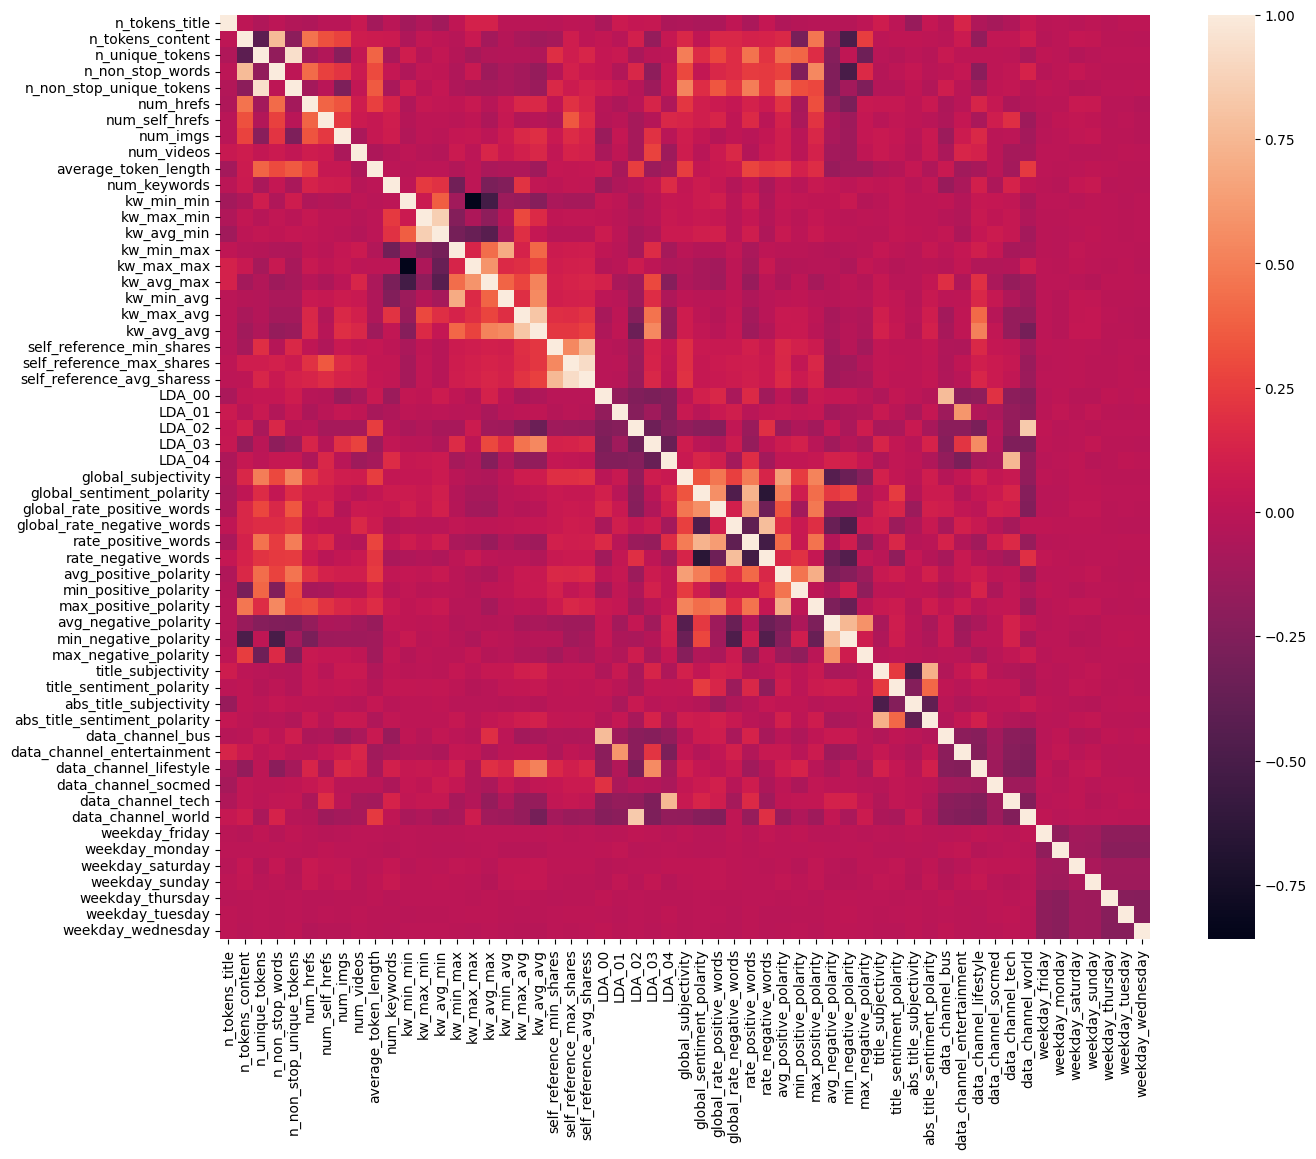

In [125]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(df_enc.drop(columns="shares").corr())

In [126]:
corr_matrix = df_enc.drop(columns="shares").corr(numeric_only=True).abs()
np.unique(np.round(corr_matrix.values, 2), return_counts=True)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.57, 0.58, 0.59, 0.6 , 0.63, 0.65, 0.69, 0.7 , 0.71, 0.73, 0.75,
        0.76, 0.77, 0.78, 0.81, 0.84, 0.86, 0.93, 0.94, 1.  ]),
 array([312, 592, 324, 232, 182, 160, 128, 122, 106,  94,  74,  82,  82,
         66,  50,  48,  28,  34,  48,  20,  26,  28,  26,  36,  26,  18,
         14,  22,  12,  12,   4,   6,   4,   8,   6,  10,   8,   2,   4,
          8,   8,   2,   8,   4,  10,   6,   6,   2,   8,   4,   6,   4,
          4,   6,   4,   2,   2,   2,   2,   4,   2,   2,   2,   2,   2,
          4,   4,   2,   2,   2,   2,   4,   2,   2,  57], dtype=int64))

In [127]:
# upper_tri = np.triu(corr_matrix, 1)
# to_drop = [column for column in range(np.shape(upper_tri)[1]) if any(upper_tri[column] > 0.9)]
# col = df_enc.drop(columns="shares").columns[to_drop]
# df_enc.drop(columns=col, inplace=True)

### Training of the model

Now we split the dataset and perform some model evaluation.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_enc.drop(columns="shares").values
y = df_enc["shares"].values
features = df_enc.drop(columns="shares").columns

test_mask = df_enc["shares"].isna()
X_train_val = X[~test_mask]
y_train_val = y[~test_mask]
X_test = X[test_mask]
y_test = y[test_mask]

df_enc.drop(columns="shares", inplace=True)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, shuffle=True,  random_state=42)

Standardization

In [129]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
X_train_std = std_sc.fit_transform(X_train)
X_val_std = std_sc.transform(X_val)

PCA

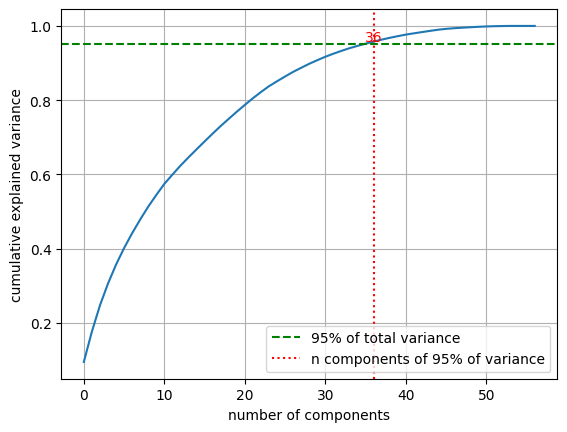

In [130]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_std)
total_variance = np.sum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.axhline(y=0.95, color='g', linestyle='--', label='95% of total variance')
plt.text(n_components_95, 0.95, str(n_components_95), color='red', ha='center', va='bottom')
plt.axvline(x=n_components_95, color='r', linestyle=':', label='n components of 95% of variance')

plt.legend()

plt.grid(True)

In [131]:
# n_components = n_components_95
# pca = PCA(n_components=n_components)
# X_train_pca = pca.fit_transform(X_train_std)
# X_val_pca = pca.fit_transform(X_val_std)
# X_train_pca.shape, X_val_pca.shape

So we do some basic regression models evaluation:

Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_std, y_train)
mean_squared_error(y_val, lin_reg.predict(X_val_std), squared=False)

4531.922713660058

Linear Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

lin_reg = Ridge()
lin_reg.fit(X_train_std, y_train)
mean_squared_error(y_val, lin_reg.predict(X_val_std), squared=False)

4531.685101426631

Linear Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

lin_reg = Lasso()
lin_reg.fit(X_train_std, y_train)
mean_squared_error(y_val, lin_reg.predict(X_val_std), squared=False)

4531.621237161636

In [41]:
from sklearn.linear_model import LassoLarsIC

lin_reg = LassoLarsIC()
lin_reg.fit(X_train_std, y_train)
mean_squared_error(y_val, lin_reg.predict(X_val_std), squared=False)

4531.481754651014

Random Forest

In [943]:
from sklearn.ensemble import RandomForestRegressor

rm = RandomForestRegressor(n_jobs=-1)
rm.fit(X_train_std, y_train)
mean_squared_error(y_val, rm.predict(X_val_std), squared=False)

4650.8293193519

SVR

In [944]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_std, y_train)
mean_squared_error(y_val, svr.predict(X_val_std), squared=False)

4949.780883482275

### ** SUBMISSION CREATION **

Standardization

In [42]:
sc = StandardScaler()
X_train_val_std = sc.fit_transform(X_train_val)
X_test_std = sc.transform(X_test)

Recursive Feature Elimination

In [43]:
from sklearn.feature_selection import RFECV

lin_reg = Lasso()

rfecv= RFECV(estimator=lin_reg, scoring="neg_root_mean_squared_error", n_jobs=-1)
rfecv = rfecv.fit(X_train_val_std, y_train_val)

print(rfecv.n_features_, -rfecv.cv_results_["mean_test_score"].mean())
print(df_enc.loc[:, rfecv.support_].columns)

45 4511.814158888263
Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'average_token_length', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'data_channel_bus', 'data_channel_entertainment', 'data_channel_socmed',
       'data_channel_tech', 'data_channel_world', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
     

In [52]:
df_enc.loc[:, ~rfecv.support_].columns

Index(['n_unique_tokens', 'num_videos', 'num_keywords', 'kw_min_max',
       'kw_max_avg', 'LDA_01', 'global_sentiment_polarity',
       'max_positive_polarity', 'min_negative_polarity',
       'abs_title_sentiment_polarity', 'data_channel_lifestyle',
       'weekday_friday'],
      dtype='object')

In [44]:
X_train_val_rfe = df_enc.loc[~test_mask, rfecv.support_].values
X_test_rfe = df_enc.loc[test_mask, rfecv.support_].values
np.shape(X_train_val_rfe), np.shape(X_test_rfe)

((31715, 45), (7917, 45))

Hyperparameter Tuning for LassoLarsIC

In [45]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion": ["aic", "bic"],
    "fit_intercept": [True, False],
    "positive": [True, False]
}

gs = GridSearchCV(LassoLarsIC(), param_grid=params, scoring="neg_root_mean_squared_error")
gs.fit(X_train_val_rfe, y_train_val)
-gs.best_score_, gs.best_params_

(4504.689392800703,
 {'criterion': 'aic', 'fit_intercept': True, 'positive': False})

Training and Inference

In [46]:
gs.best_estimator_.fit(X_train_val_rfe, y_train_val)
y_pred = gs.best_estimator_.predict(X_test_rfe)

Output

In [47]:
pd.DataFrame(y_pred, index=df[test_mask].index).to_csv("output.csv", index_label="Id", header=["Predicted"])